# Assignment 1

## EOSC 211

logistics, partner collaboration, due dates

LG's:

* manipulate datetime objects, timedeltas
* use dictionaries to access complex datasets

### notes for andrew:

part 1: I can use if elif else, loops, numpy arrays, logical indexing, annotate, subplots, type casting

part 2: I can use f strings, maybe dictionaries, maybe functions

## Introduction

The ocean in the Salish Sea is affected by tidal forces,  wind, and spatial changes in density,  all of which drive currents.  What do these currents do?  If we release a floating object in the Strait of Georgia (the part of the Salish Sea right beside Vancouver), where will it end up?  Simple questions like turn out to be surprisingly difficult to answer. At present, we do know that there is an “estuarine” circulation in the Salish Sea.  Fresh water flows in from the Fraser River just south of Richmond.  This fresh water eventually ends up in the Pacific*.  So, there is a mean flow of surface water out of the Fraser, south past Victoria and then west out to the Pacific$^†$.  We also know that it takes a few weeks to get there, and so objects floating in the Strait probably also take about that long to leave our waters. But we would like to get a better idea of what the mean speed of their drift is, and how this mean might change from time to time. 

Over the past few years, the [ODL drifters project](www.drifters.eoas.ubc.ca) has been releasing GPS-tracked drifters into the Strait of Georgia near the mouth of the Fraser River, in order to better understand how the surface water flows out to the Pacific. In the assignment, you will analyze some of the data from this project.

---
\* If it didn’t, the whole area would eventually be full of fresh water only, but it isn’t

† We think that very little goes around the northern tip of Vancouver Island because there is only a narrow channel separating it from the mainland there

## Part 1: Summary Plot

text

In [1]:
## get data (put this in the library when complete)
import numpy as np
from scipy.io import loadmat
from e211_lib import e211
from matplotlib import pyplot as plt

In [109]:
## Hide this cell in library ##

# import the whole dataset
matdata = loadmat("Drifter_dataset.mat")
matdata = matdata["D"].flatten()

##################################################################################
# modify each element one by one, they all have slightly different shapes/dtypes #
##################################################################################

drifter_id = np.concatenate(matdata["id"]).flatten() # drifter ID 

design = np.concatenate(matdata["design"]).flatten() # 1-6 which type of drifter

tzone = np.concatenate(matdata["tzone"]).flatten() # time zone

mtime = matdata["mtime"]  # time in matlab ordinal (decimal days since jan1/0000)
# create a new array datetime to replace messy mtime
datetime = np.empty_like(mtime, dtype="O")
for m in range(len(mtime)):
    timestamp = np.empty(len(mtime[m]), dtype="O")
    for n in range(len(mtime[m].flatten())):
        timestamp[n] = e211.mdate_to_datetime(mtime[m][n,0])
    datetime[m] = timestamp

lon_in = matdata["lon"]  # drifter lons
# create new variable lons containing restructured longitudes
lons = np.empty_like(lon_in, dtype="O")
for m in range(len(lon_in)):
    lon = np.empty(len(lon_in[m]))
    for n in range(len(lon_in[m])):
        lon[n] = lon_in[m][n]
    lons[m] = lon

lat_in = matdata["lat"] # drifter lats
# same treatment for lats
lats = np.empty_like(lat_in, dtype="O")
for m in range(len(lat_in)):
    lat = np.empty(len(lat_in[m]))
    for n in range(len(lat_in[m])):
        lat[n] = lat_in[m][n]
    lats[m] = lat

comment = np.concatenate(matdata["comment"]).flatten()  # metadata

at_sea_in = matdata["atSea"]  # status codes for working/landed drifters

# at_sea treatment echoes lats and lons
at_sea = np.empty_like(at_sea_in, dtype="O")
for m in range(len(at_sea_in)):
    sea = np.empty(len(at_sea_in[m]))
    for n in range(len(at_sea_in[m])):
        sea[n] = at_sea_in[m][n]
    at_sea[m] = sea
    
ends_on_land = matdata["endsOnLand"].flatten() # change from 1/0 logic to Python booleans
ends_on_land[ends_on_land == 1] = True
ends_on_land[ends_on_land == 0] = False

found_on_land = matdata["foundOnLand"].flatten() # use booleans not 1/0
found_on_land[found_on_land == 1] = True
found_on_land[found_on_land == 0] = False

# convert data containing dates to datetime objs
launchdate_in = np.concatenate(matdata["launchDate"]).flatten()
launchdate = np.empty(len(launchdate_in), dtype='O')
for i, ld in enumerate(launchdate_in):
    launchdate[i] = e211.mdate_to_datetime(ld)
        
enddate_in = np.concatenate(matdata["endDate"]).flatten()  
enddate = np.empty(len(enddate_in), dtype = "O")
for i, ed in enumerate(enddate_in):
    enddate[i] = e211.mdate_to_datetime(ed)

lifetime_in = np.concatenate(matdata["lifeTime"]).flatten()  # decimal days from launchDate to endDate
lifetime = enddate - launchdate # ignore the original data and do datetime arithmetic. Get students to do this?

refloated = matdata["refloated"] # change to py logical
refloated[refloated == 1] == True
refloated[refloated == 0] == False

first_ground_date_in = matdata["firstGrndDate"] 
first_ground_date = np.empty(len(first_ground_date_in), dtype='O') 
for i, fgd in enumerate(first_ground_date_in):
    if fgd == 0:
        first_ground_date[i] = enddate[i]
    else:
        first_ground_date[i] = e211.mdate_to_datetime(fgd[0,0])
    
                             # - float: matlab time for first grounding
                             #- matlab time of first of a string of atSea~=1, unless
                             # the last point in the record has atSea==1 and
                             # endsOnLand==1 in which case it is the time of the last
                             # point.

first_lifetime_in = matdata["firstLifeTime"]
first_lifetime = first_ground_date - launchdate # make students do this?

# new datastructure: Each drifter is a dictionary with all vars above as keys, values are either arrays or numbers
# save an array containing all the drifter "objects" (actually dictionaries...) array full of dictionaries full 
# of arrays! 
master_dataset = np.empty(len(drifter_id), dtype='O')
for i, data in enumerate(master_dataset):
     master_dataset[i] =  {"drifter_id":drifter_id[i], 
             "design":design[i], 
             "tzone":tzone[i], 
             "datetime":datetime[i], 
             "lons":lons[i], 
             "lats":lats[i], 
             "comment":comment[i], 
             "at_sea":at_sea[i], 
             "ends_on_land":ends_on_land[i], 
             "found_on_land":found_on_land[i], 
             "launchdate":launchdate[i], 
             "enddate":enddate[i], 
             "lifetime":lifetime[i], 
             "refloated":refloated[i],
             "first_ground_date":first_ground_date[i],
             "first_lifetime":first_lifetime[i]} 

In [115]:
# save as a npy file
#np.save("drifter_data.npy", master_dataset)

In [ ]:
data = np.

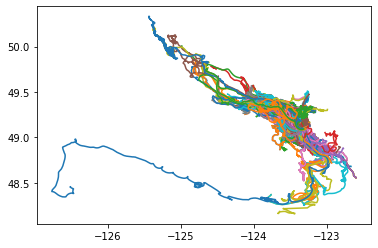

In [113]:
fig, ax = plt.subplots()
for n, data in enumerate(master_dataset):
    ax.plot(master_dataset[n]["lons"], master_dataset[n]["lats"])